In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def one_year_events(R_m, R_f, n, Mortality_m, Mortality_f, migr_coef, Pop_distrib, Birthrate, boy_prob):
    #Birth
    children_num = sum([np.random.binomial(R_f[i], Birthrate[i]) for i in range(R_f.shape[0])])
    boys_num = np.random.binomial(children_num, boy_prob)
    R_m[0] += boys_num
    R_f[0] += children_num-boys_num
    #Death
    R_m -= np.random.binomial(R_m, Mortality_m)
    R_f -= np.random.binomial(R_f, Mortality_f)
    #Migration
    Migr = np.random.multinomial(round(n*abs(migr_coef)), Pop_distrib)
    Male_Migr = np.random.binomial(Migr, [boy_prob]*Migr.shape[0])
    R_m = R_m+np.sign(migr_coef)*Male_Migr
    R_f = R_f+np.sign(migr_coef)*(Migr-Male_Migr)
    R_m, R_f = R_m.astype(int), R_f.astype(int)
    n = sum(R_m)+sum(R_f)
    return R_m, R_f, n

In [3]:
def pop_num_dynamics(starty, finishy, R_m, R_f, n, Mortality_m, Mortality_f, migr_coef, Pop_distrib, Birthrate, boy_prob):
    MANS, FEMS, NUMS = np.array([sum(R_m)]), np.array([sum(R_f)]), np.array([n])
    GRID = np.arange(starty, finishy, 1)
    for y in range(1, finishy-starty):
        R_m, R_f, n = one_year_events(R_m, R_f, n, Mortality_m, Mortality_f, migr_coef, Pop_distrib, Birthrate, boy_prob)
        MANS = np.append(MANS, sum(R_m))
        FEMS = np.append(FEMS, sum(R_f))
        NUMS = np.append(NUMS, n)
        R_m[1:R_m.shape[0]] = R_m[0:R_m.shape[0]-1]
        R_f[1:R_f.shape[0]] = R_f[0:R_f.shape[0]-1]
        R_m[0], R_f[0] = 0, 0
    plt.figure(figsize=(16,8))
    #plt.plot(GRID, MANS, label="$MANS$")
    #plt.plot(GRID, FEMS, label="$FEMS$")
    plt.plot(GRID, NUMS, label="Nums")
    plt.title('Population', fontsize=20)
    plt.xlabel('$year$', fontsize=20)
    plt.ylabel('$people$', fontsize=20)
    plt.grid(True)
    plt.legend()
    plt.show()

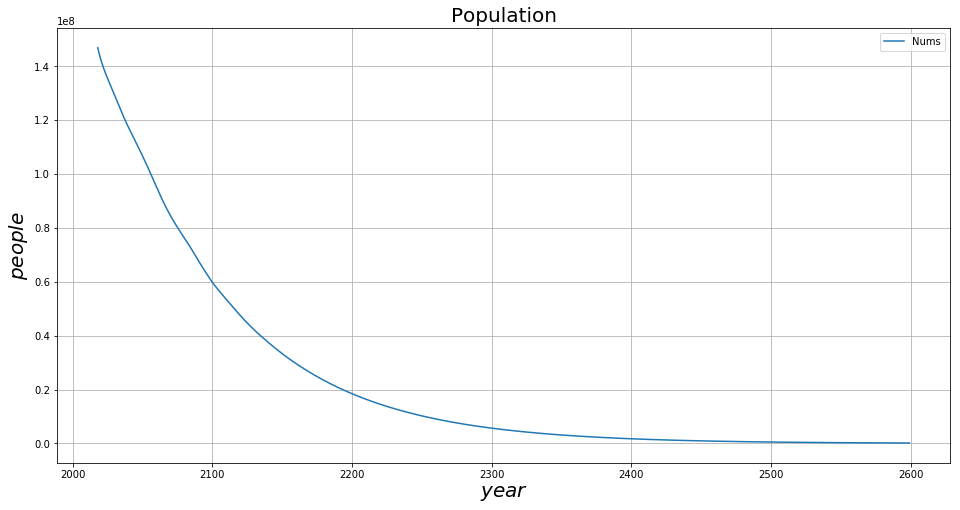

In [44]:
R_m = np.array([int(a.replace(",", ".")) for a in open(r"d:\LEARN\NGU\2kProga\R_Male2008.txt").read().split()])
R_f = np.array([int(a.replace(",", ".")) for a in open(r"d:\LEARN\NGU\2kProga\R_Female2008.txt").read().split()])
Mortality_m = np.array([float(a.replace(",", ".")) for a in open(r"d:\LEARN\NGU\2kProga\Mortality_M.txt").read().split()])
Mortality_f = np.array([float(a.replace(",", ".")) for a in open(r"d:\LEARN\NGU\2kProga\Mortality_F.txt").read().split()])
Pop_distrib = np.array([float(a.replace(",", ".")) for a in open(r"d:\LEARN\NGU\2kProga\Pop_Distrib.txt").read().split()])
Birthrate = np.array([float(a.replace(",", ".")) for a in open(r"d:\LEARN\NGU\2kProga\Birthrate.txt").read().split()])
pop_num_dynamics(2018, 2600, R_m, R_f, sum(R_m)+sum(R_f), Mortality_m, Mortality_f, 0.00142, Pop_distrib, Birthrate, 0.51)